# 第二章　単位住戸の一次エネルギー消費量 / Chapter 2 Designed Primary Energy Consumption

In [12]:
from pyhees.section2_1 import calc_E_T 
from pyhees.section2_1 import calc_E_ST
from pyhees.section2_1 import calc_BEI

# 試算例

In [13]:
def get_default_house():
    
    house = {
        # 基本情報
        'type': '一般住宅',
        'tatekata': '戸建住宅',
        'A_A': 120.08,
        'A_MR': 29.81,
        'A_OR': 51.34,
        'region': 6,
        'sol_region': None,
        'reference': {'result_type': '建築物エネルギー消費性能基準（H28 年 4 月以降）', 'reference_year': 'H28'},

        # 外皮
        'ENV': {"A_env": 307.51, "U_A": 0.87, "eta_A_H": 4.3, "eta_A_C": 2.8,
                'method': '当該住宅の外皮面積の合計を用いて評価する'},
        "NV_MR": 0, "NV_OR": 0,

        'r_A_ufvnt': None,
        'HEX': None,
        'underfloor_insulation': None,
        'TS': None,

        # 暖房
        'mode_H': '居室のみを暖房する方式でかつ主たる居室とその他の居室ともに温水暖房を設置する場合に該当しない場合',
        'H_MR': {'type': 'ルームエアコンディショナー', 'e_class': 'は', 'dualcompressor': False},
        'H_OR': {'type': 'ルームエアコンディショナー', 'e_class': 'は', 'dualcompressor': False},
        'H_A': None,
        'H_HS': None,

        # 冷房
        'mode_C': '居室のみを冷房する方式',
        'C_A': None,
        'C_MR': {"type": "ルームエアコンディショナー", 'e_class': 'は', 'dualcompressor': False},
        'C_OR': {'type': 'ルームエアコンディショナー', 'e_class': 'は', 'dualcompressor': False},

        # 換気
        'V': {'type': 'ダクト式第二種換気設備又はダクト式第三種換気設備',
              'input': '比消費電力', 'f_SFP': 0.30, 'N': 0.5},

        # 熱交換
        'HEX': None,

        # 給湯
        'HW': {'hw_type': 'ガス従来型給湯機', 'e_rtd': 0.704, 'e_dash_rtd': None, 'hybrid_category': None,
               'bath_function': 'ふろ給湯機(追焚あり)', 'has_bath': True, 'pipe_diameter': '上記以外',
               'kitchen_watersaving_A': False, 'kitchen_watersaving_C': False,  'shower_watersaving_A': False,
               'shower_watersaving_B': False, 'washbowl_watersaving_C': False, 'bath_insulation': False},
        
        # 照明
        'L': {'MR_installed': '設置しない', 'MR_power': None, 'MR_multi': None, 'MR_dimming': None,
              'has_OR': True, 'OR_installed': '設置しない', 'OR_power': None, 'OR_dimming': None,
              'has_NO': True, 'NO_installed': '設置しない', 'NO_power': None, 'NO_sensor': None,
              },

        # PV
        'PV': None,

        # 太陽熱
        'SHC': None,

        # コージェネ
        'CG': None

    }

    house['ENV']['A_A'] = house['A_A']
    
    return house
    

In [14]:
def calc_results(house):
    
    if __name__ == '__main__':
        
        reference = house['reference']
        
        E_T, E_H, E_C, E_V, E_L, E_W, E_S, E_M, UPL, E_gen, E_E_gen, E_E_PV_h_d_t, E_E, E_G, E_K = calc_E_T(house)
        E_ST, E_SH, E_SC, E_SV, E_SL, E_SW, E_SM = calc_E_ST(house)
        BEI = calc_BEI(E_H, E_C, E_V, E_L, E_W, E_S, E_M, E_SH, E_SC, E_SV, E_SL, E_SW, E_SM, reference, type)
        
        
        # BEIで用いるE_star_STは'建築物エネルギー消費性能基準（平成 28 年 4 月 1 日時点で現存しない住宅）'とする
        E_ST_gn_p = E_ST['E_ST_gn_p']
        
        print('E_H:{}, E_C:{}, E_V:{}, E_W:{}, E_L:{}, E_S:{}, E_M:{}'.format(E_H, E_C, E_V, E_W, E_L, E_S, E_M))
        print('E_T:{}MJ/a'.format(E_H + E_C + E_V + E_W + E_L + E_S + E_M))
        print('E_T:{}GJ/a'.format(E_T))
        
        print('E_SH:{}, E_SC:{}, E_SV:{}, E_SW:{}, E_SL:{}, E_SM:{}'.format(E_SH, E_SC, E_SV, E_SW, E_SL, E_SM))
        print('E_ST:{}MJ/a:'.format(E_SH + E_SC + E_SV + E_SL + E_SW + E_SM))
        print('E_ST:{}GJ/a:'.format(E_ST_gn_p))
        print('BEI:{}'.format(BEI))
        
        res_dict = {'E_T': E_T, 'E_H':  E_H, 'E_C':  E_C, 'E_V':  E_V, 'E_W':  E_W, 'E_L':  E_L, 'E_S':  E_S, 'E_M':  E_M}

        return res_dict


### 計算条件1

初期条件での計算

In [15]:
house = get_default_house()
res_1 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 1073.002971979867 [kWh] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 168.14066632353965 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 142.86529705803406 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 

### 計算条件2

- 暖房設備をFF暖房機に変更。  
- 冷房設備の効率を（ろ）に変更。  
- 基準値を共同住宅に変更。

In [16]:
house = get_default_house()

house['H_MR'] = {'type': 'FF暖房機', 'e_rtd_H': 0.860}
house['H_OR'] = {'type': 'FF暖房機', 'e_rtd_H': 0.860}
house['tatekata'] = '共同住宅'


res_2 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
FF暖房機 E_E_H_d_t_1 = 62.80223338718522 [kWh] (L_H_d_t_1 = 11859.427924442796 [MJ])
FF暖房機 E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
FF暖房機 E_E_H_d_t_4 = 12.681284803170268 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
FF暖房機 E_E_H_d_t_5 = 10.257447889032202 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
FF暖房機 E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 11859.427924442796 [MJ])
FF暖房機 E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
FF暖房機 E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
FF暖房機 E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 1693.270712742907 [MJ])
FF暖房機 E_G_H_d_t_5 = 0.0 [MJ] (L_H_d_t_5 

### 計算条件3

- 地域区分を7地域に変更。  
- 給湯を電気ヒーター給湯器に変更。  

In [17]:
house = get_default_house()

house['region'] = 7
house['HW']['hw_type'] = '電気ヒーター給湯機'

res_3 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 461.6667476375719 [kWh] (L_H_d_t_1 = 14481.54117557757 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 53.698986966448864 [kWh] (L_H_d_t_3 = 14481.54117557757 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 123.17990708956336 [kWh] (L_H_d_t_4 = 14481.54117557757 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 114.19479880513953 [kWh] (L_H_d_t_5 = 14481.54117557757 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 559.917693307059 [kWh] (L_H_d_t_1 = 5942.379028840949 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 93.24893872159669 [kWh] (L_H_d_t_4 = 798.4062795993377 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 78.67822007688615 [kWh] (L_H_d_t_5 = 704.3130811011476 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 5942.379028840949 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 798.40627

### 計算条件4

- 洗面水栓の水優先吐水機能の採用
- 浴槽の保温措置の採用

In [18]:
house = get_default_house()

house['HW']['washbowl_watersaving_C'] = True
house['HW']['bath_insulation'] = True

res_4 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 1073.002971979867 [kWh] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 168.14066632353965 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 142.86529705803406 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 

### 計算条件5

- 主居室の照明を全てLEDに変更

In [19]:
house = get_default_house()

house['L']['MR_installed'] = '設置する'
house['L']['MR_power'] = 'すべての機器においてLEDを使用している'
house['L']['MR_multi'] = '採用しない'
house['L']['MR_dimming'] = '採用しない'

res_5 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 1073.002971979867 [kWh] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 168.14066632353965 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 142.86529705803406 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 

### 計算条件6

- その他居室の照明を全てLEDに変更

In [20]:
house = get_default_house()

house['L']['OR_installed'] = '設置する'
house['L']['OR_power'] = 'すべての機器においてLEDを使用している'
house['L']['OR_dimming'] = '採用する'

res_6 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 1073.002971979867 [kWh] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 168.14066632353965 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 142.86529705803406 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 

### 計算条件7

- 主居室、その他居室の暖房設備を温水暖房用床暖房（敷設率40%、上面放熱率90%）に変更
- 暖房熱源機をガス潜熱回収型温水暖房機（効率87%）に変更
- 配管断熱なし、配管が通過する空間は全て断熱区画内に変更

In [21]:
house = get_default_house()

house['H_MR'] = {'type': '温水暖房用床暖房', 'r_Af': 0.4, 'r_up': 0.95}
house['H_OR'] = {'type': '温水暖房用床暖房', 'r_Af': 0.4, 'r_up': 0.95}
house['H_HS'] = {'type': 'ガス潜熱回収型温水暖房機', 'e_rtd_hs': 0.87, 'pipe_insulation': False, 'underfloor_pipe_insulation': True}

res_7 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ガス潜熱回収型温水暖房機 E_G_hs = 32545.234514603766 [MJ] (L_T_H_rad = 23945.875770961058 [MJ])
ガス潜熱回収型温水暖房機 E_E_hs = 255.83002876216983 [kwh]
温水暖房用床暖房 E_E_rad_d_t_1 = 0.0 [KWh] (L_T_H_rad_d_t_1 = 12233.887997985712 [MJ])
温水暖房用床暖房 E_E_rad_d_t_3 = 0.0 [KWh] (L_T_H_rad_d_t_3 = 4552.44225171369 [MJ])
温水暖房用床暖房 E_E_rad_d_t_4 = 0.0 [KWh] (L_T_H_rad_d_t_4 = 3163.4832089328484 [MJ])
温水暖房用床暖房 E_E_rad_d_t_5 = 0.0 [KWh] (L_T_H_rad_d_t_5 = 3996.0623123288087 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ガス潜熱回収型温水暖房機 E_G_hs = 32545.234514603766 [MJ] (L_T_H_rad = 23945.875770961058 [MJ])
ガス潜熱回収型温水暖房機 E_K_hs = 0.0 [MJ] (L_T_H_rad = 2394

## 設計一次エネルギー消費量の比較

             E_T           E_H          E_C          E_V           E_W  \
testcase1   84.3  13935.004845  6035.986379  4583.320857  27637.315471   
testcase2   88.7  18313.953631  6035.986379  4583.320857  27637.315471   
testcase3  106.5   7281.403204  7346.746699  4583.320857  55112.090091   
testcase4   83.5  13935.004845  6035.986379  4583.320857  26782.376680   
testcase5   80.9  13935.004845  6035.986379  4583.320857  27637.315471   
testcase6   82.2  13935.004845  6035.986379  4583.320857  27637.315471   
testcase7  106.3  35928.742564  6035.986379  4583.320857  27637.315471   

                    E_L  E_S           E_M  
testcase1  10855.426787  0.0  21240.608512  
testcase2  10855.426787  0.0  21240.608512  
testcase3  10855.426787  0.0  21240.608512  
testcase4  10855.426787  0.0  21240.608512  
testcase5   7410.982497  0.0  21240.608512  
testcase6   8737.408435  0.0  21240.608512  
testcase7  10855.426787  0.0  21240.608512  


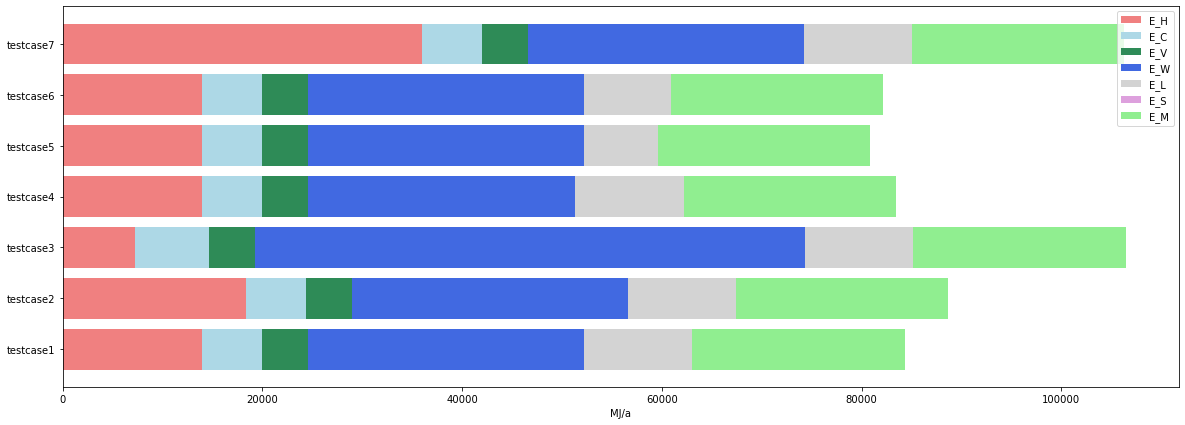

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DBdict = {'testcase1': res_1, 'testcase2': res_2, 'testcase3': res_3, 'testcase4': res_4, 'testcase5': res_5, 'testcase6': res_6,
          'testcase7': res_7}
DB = pd.DataFrame(DBdict)
print(DB.T)
DB_Ene = DB.T.to_dict()

fig = plt.figure(figsize = (20,7))
grh = fig.add_subplot(111)
grh.set_xlabel('MJ/a')

axNameArr = list(DB_Ene['E_T'].keys())
ayNameArr = ("E_H", "E_C", "E_V", "E_W", "E_L", "E_S", "E_M")
colors = ('lightcoral', 'lightblue', 'seagreen', 'royalblue', 'lightgray', 'plum', 'lightgreen')
left_data = np.zeros(len(axNameArr))

E_Harr = np.array(list(DB_Ene["E_H"].values()))
E_Carr = np.array(list(DB_Ene["E_C"].values()))
E_Varr = np.array(list(DB_Ene["E_V"].values()))
E_Warr = np.array(list(DB_Ene["E_W"].values()))
E_Larr = np.array(list(DB_Ene["E_L"].values()))
E_Sarr = np.array(list(DB_Ene["E_S"].values()))
E_Marr = np.array(list(DB_Ene["E_M"].values()))
EneArr = (E_Harr, E_Carr, E_Varr, E_Warr, E_Larr, E_Sarr, E_Marr)

i=0
for UsageEne in EneArr:
    grh.barh(axNameArr, list(UsageEne), color=colors[i], label=ayNameArr[i], left=left_data)
    left_data += UsageEne
    i += 1

grh.legend()
plt.show()